# Сборный проект: Исследование закономерностей, определяющих успешность компьютерной игры.

Предстоит работа с данными интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

-----------
###### Цель работы: 
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

------------
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

###### Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


## Предобработка данных 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu

In [2]:
# data = pd.read_csv('/Users/dianamini/Developer/Data/games.csv')
# data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Year_of_Release перевести в int
- User_Score перевести в float

In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

- Пропуски в Name проверю есть ли там важная информация
- Пропуски в Year_of_Release заполню выбивающимся значением
- В Critic_Score, User_Score, Rating заменю на среднее по жанру

### Обработка названий столбцов <a id="columns"></a>

In [5]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


- Привела названия столбцов к нижнему регистру.

### Удаление лишних строк  

In [6]:
data['name'] = data['name'].fillna(value = 'Noname')

In [7]:
df = data[data['name'] == 'Noname']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Noname,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Noname,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- В этих двух строках нет рейтинга, посмотрим есть ли еще игры 1993 года и какая информация по ним.

In [8]:
df = data[data['year_of_release'] == 1993.0]
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
56,Super Mario All-Stars,SNES,1993.0,Platform,5.99,2.15,2.12,0.29,NaN,NaN,NaN
476,Star Fox,SNES,1993.0,Shooter,1.61,0.51,0.80,0.07,NaN,NaN,NaN
659,Noname,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
852,Super Street Fighter II,SNES,1993.0,Fighting,0.52,0.16,1.29,0.03,NaN,NaN,NaN
892,Mortal Kombat II,SNES,1993.0,Fighting,1.48,0.39,0.00,0.06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12997,Pachinko Wars II,SNES,1993.0,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13189,Keiba Eight Special,SNES,1993.0,Sports,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,Noname,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- Удаляю две строки с Noname, так как огромной ценности они не несут, а дополнить пропуски не вижу возможности.

In [9]:
data = data.set_index('name')
data = data.drop('Noname')
data = data.reset_index()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
df = data[data['name'] == 'Noname']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


- Избавилась от двух бесполезных строк. 

### Замена пропущенных значений

In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

- В столбце rating я заменю пропуски в играх до 2016 года на "E", то есть они будут помечены как "Для всех".
- Игры 2016 года будут помечены рейтингом "RP", так как они новые и могут ожидать оценки.

In [12]:
data.loc[data['year_of_release'] == 2016, 'rating'] = data.loc[data['year_of_release'] == 2016, 'rating'].fillna('RP')
data.loc[data['year_of_release'] != 2016, 'rating'] = data.loc[data['year_of_release'] != 2016, 'rating'].fillna('E')
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

- Избавилась от пропущенных значений в rating

In [13]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')

In [14]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

- Поменяла тип данных в столбце user_score на float64
- Заменила пропуски в critic_score и user_score на среднее по жанру
- Заменила пропуски в year_of_release на неправдоподобное значение чтобы не терять остальные важные параметры этих строк. Так я смогу отсеять при дальнейшем анализе эти значения, если понадобится.

### Замена типов данных 

In [15]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


- Все типы данных теперь в порядке

In [17]:
data['year_of_release'].astype(pd.Int64Dtype())

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16708    2016
16709    2006
16710    2016
16711    2003
16712    2016
Name: year_of_release, Length: 16713, dtype: Int64

### Создание дополнительного столбца  <a id="new_column"></a>

In [18]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E,30.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01


- Добавила столбец с общей выручкой

### Вывод <a id="total_1"></a>

Пропущенные значения в столбцах critic_score и user_score я заменила на среднее значение по жанру. Предполагаю, что пропущенные значения могли появиться из-за отсутствия данных за 1990-е года. 

Так же в столбце user_score мной были обнаружены значения "tbd", оно означает, что решение по этому критерию пока не принято. Так что и их я заменила на среднее по жанру, чтобы не терять такую большую часть данных.

Так же я удалила 2 строки, которые не содержали в себе никакой информации кроме года выпуска и продаж, я посчитала их ненужными. 

В столбцах user_score и year_of_release я сменила типы данных для облегчения дальнейшего анализа.

Добавила столбец total_sales с суммарными продажами по всем регионам.

## Исследовательский анализ данных 

### Анализ продаж по годам 

In [19]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E,30.38


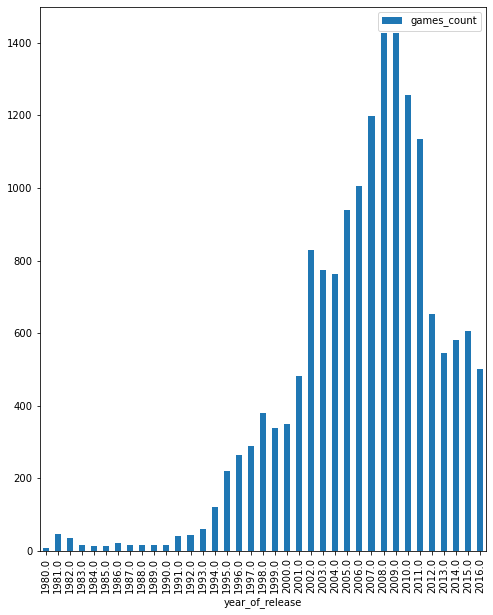

In [20]:
data_years = pd.pivot_table(data, index='year_of_release', values = 'name', aggfunc = 'count')
data_years.columns = ['games_count']
data_years = data_years.query('year_of_release != 1000').plot(kind='bar', figsize = (8,10))
plt.show()

- На гистограмме я вижу неравномерное распледеление, смещенное вправо.
- Делаю вывод, что игры с 1980 года по 1990 год можно не использовать для анализа, так как это явный выброс, который можно отсеять.
- Так же с помощью метода query я убрала из сводной таблицы игры 1000-го года выпуска, так как эти строки для данного анализа непригодны.

### Анализ самых успешных платформ 

In [21]:
data_platform = pd.pivot_table(data, index=['platform'], values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending=False)
data_platform_top = data_platform.head(18)
data_platform_top

,total_sales
platform,
PS2,1062.33
X360,885.66
Wii,828.44
PS3,803.97
DS,746.86
PS,689.95
GBA,310.12
PS4,265.79
PSP,252.63


In [22]:
data = data.set_index('platform')
top_platforms_pivot = data[data.index.isin(data_platform_top.index)]
top_platforms_pivot

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
Wii,Wii Sports,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
NES,Super Mario Bros.,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,E,39.47
Wii,Mario Kart Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
Wii,Wii Sports Resort,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
GB,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,E,30.38
...,...,...,...,...,...,...,...,...,...,...,...
GBA,Woody Woodpecker in Crazy Castle 5,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
PS2,SCORE International Baja 1000: The Official Game,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,E,0.00
PS3,Samurai Warriors: Sanada Maru,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


In [23]:
top_platforms_ten = pd.pivot_table(top_platforms_pivot, index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').query('year_of_release != 1000').reset_index()
top_platforms_ten.head()

,platform,year_of_release,total_sales
0,3DS,2011.0,58.80
1,3DS,2012.0,48.77
2,3DS,2013.0,53.97
3,3DS,2014.0,41.75
4,3DS,2015.0,26.75


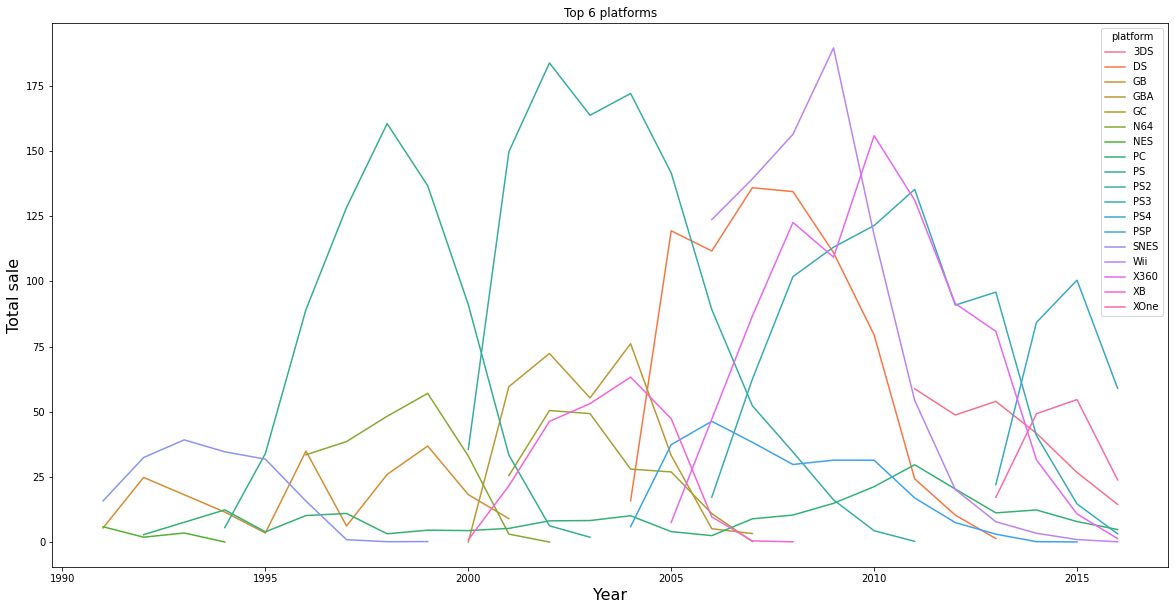

In [24]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=top_platforms_ten.query('year_of_release >= 1991'))
plt.xlabel('Year',fontsize=16)
plt.ylabel('Total sale',fontsize=16)
plt.title('Top 6 platforms')
plt.show()

- Я выделила топ 18 платформ, с самой высокой прибылью за все время.
- В среднем цикл жизни одной платформы занимает около 10 лет. Исключением из правил можно считать платформу DS, которая "прожила" больше 30 лет, и PC, она все еще работает с середины 1990-х.


Анализ основных игровых платформ показал:
- Три лидирующие по продажам платформы - PC, PS3, Wii
- Платформы PS4 и XOne начинают набирать рост, можно считать их потенциально прибыльными
- Из платформ, продолжающих работать в 2016 году на спад идут Wii, X360, PS3, 3DS и PC

In [25]:
top_platforms_ten = top_platforms_ten.query('year_of_release >= 2005')
top_platforms_pivot = top_platforms_pivot.query('year_of_release >= 2005')

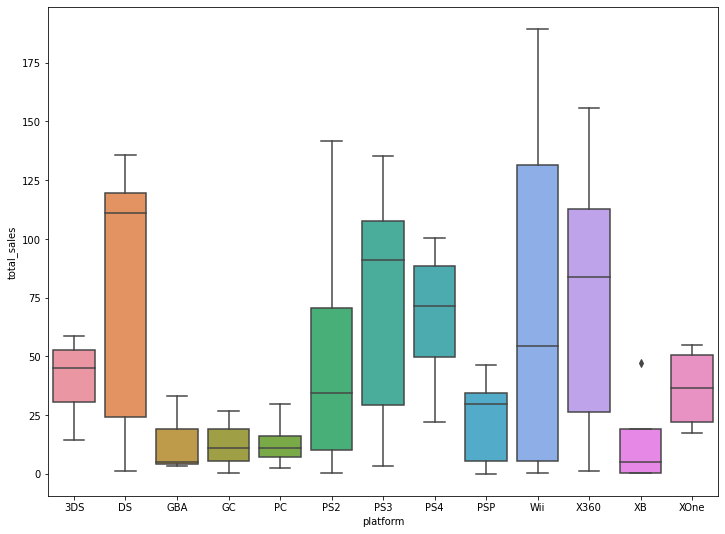

In [26]:
plt.figure(figsize=(12, 9))
sns.boxplot(x='platform', y='total_sales', data = top_platforms_ten)
plt.show()

- Платформы PS2, PS3, PS4 можно считать самыми успешными на рынке компьютерных игр. Учитывая, что все эти платформы продукт одной линейк "Play station", вместе они составляют самое большое количество продаж.
- Платформы DS, Wii и X360 так же занимают лидирующие позиции по количеству продаж.

In [27]:
top_platforms_pivot['user_score'] = top_platforms_pivot['user_score'] * 10
pd.set_option('chained_assignment', None)
top_platforms_pivot.head()

/var/folders/vx/vjxdxpfx19j6k3fggtp493v00000gq/T/ipykernel_3760/1494678349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_platforms_pivot['user_score'] = top_platforms_pivot['user_score'] * 10


,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
platform,,,,,,,,,,,
Wii,Wii Sports,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,74.09
Wii,Mario Kart Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,32.23
Wii,Wii Sports Resort,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,29.82
DS,New Super Mario Bros.,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,26.92
Wii,Wii Play,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,66.0,E,26.07


- Умножила показатели в столбце user_score на 10 для удобства сравнения.

### Анализ зависимости продаж от оценок пользователей и критиков

In [28]:
top_platforms_pivot = top_platforms_pivot.reset_index()
ps2_all = top_platforms_pivot[top_platforms_pivot['platform'] == 'PS2']
ps2_all.head()

,platform,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
93,PS2,Final Fantasy XII,2006.0,Role-Playing,1.88,0.00,2.33,1.74,92.0,76.0,T,4.21
117,PS2,Guitar Hero II,2006.0,Misc,3.81,0.63,0.00,0.68,92.0,85.0,T,4.44
124,PS2,Guitar Hero III: Legends of Rock,2007.0,Misc,3.49,0.01,0.01,1.48,82.0,82.0,T,3.51
129,PS2,Madden NFL 06,2005.0,Sports,3.98,0.26,0.01,0.66,88.0,80.0,E,4.25
144,PS2,Madden NFL 07,2006.0,Sports,3.63,0.24,0.01,0.61,84.0,82.0,E,3.88


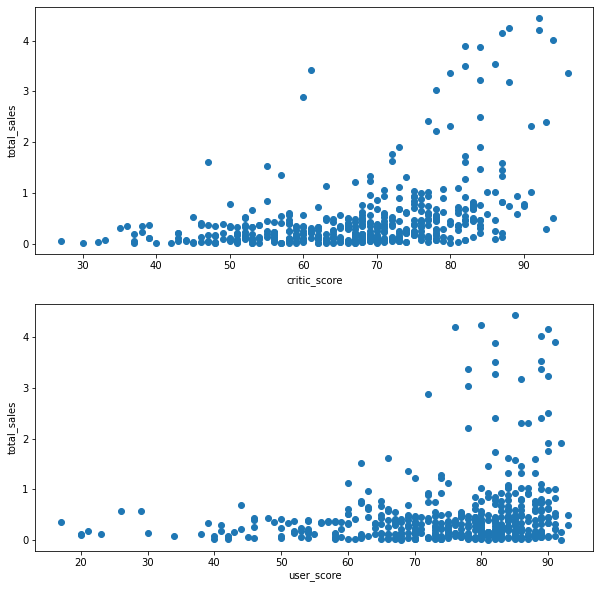

In [29]:
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].scatter(x = ps2_all['critic_score'], y = ps2_all['total_sales'])
ax[0].set_xlabel("critic_score")
ax[0].set_ylabel("total_sales")

ax[1].scatter(x = ps2_all['user_score'], y = ps2_all['total_sales'])
ax[1].set_xlabel("user_score")
ax[1].set_ylabel("total_sales")

plt.show()

In [30]:
print('Корреляция между отзывами критиков и продажами:', ps2_all['critic_score'].corr(ps2_all['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', ps2_all['user_score'].corr(ps2_all['total_sales']))

Корреляция между отзывами критиков и продажами: 0.4196411692188944
Корреляция между отзывами пользователей и продажами: 0.21298752886009986


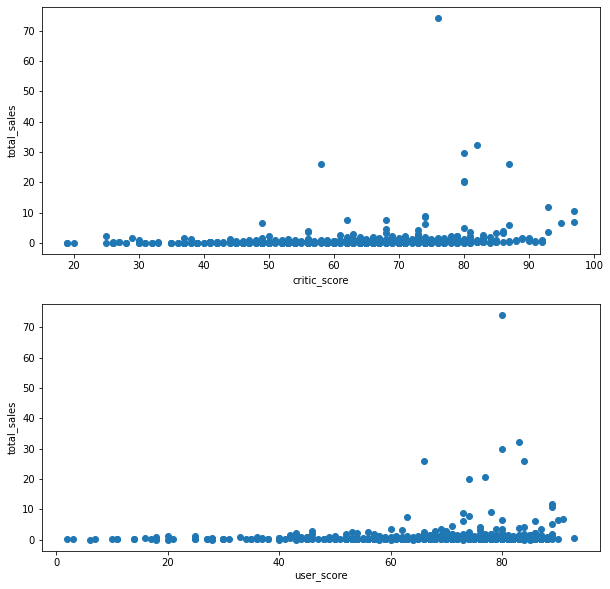

In [31]:
wii_all = top_platforms_pivot[top_platforms_pivot['platform'] == 'Wii']

fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].scatter(x = wii_all['critic_score'], y = wii_all['total_sales'])
ax[0].set_xlabel("critic_score")
ax[0].set_ylabel("total_sales")

ax[1].scatter(x = wii_all['user_score'], y = wii_all['total_sales'])
ax[1].set_xlabel("user_score")
ax[1].set_ylabel("total_sales")

plt.show()

In [32]:
print('Корреляция между отзывами критиков и продажами:', wii_all['critic_score'].corr(wii_all['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', wii_all['user_score'].corr(wii_all['total_sales']))

Корреляция между отзывами критиков и продажами: 0.17946768303150828
Корреляция между отзывами пользователей и продажами: 0.11375325972327704


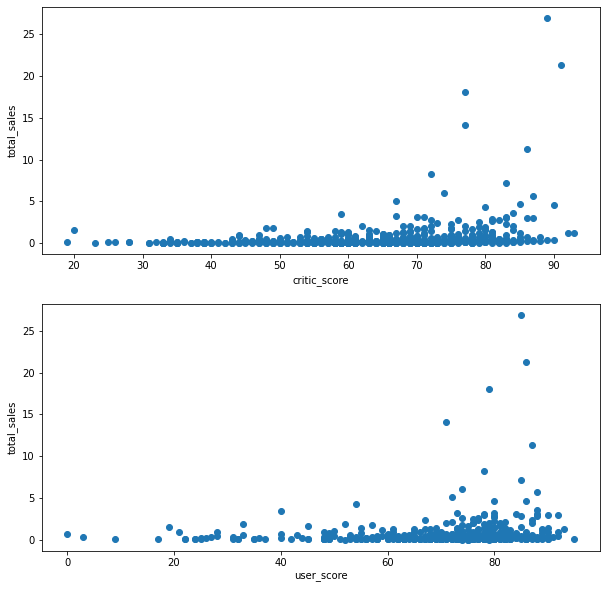

In [33]:
ds_all = top_platforms_pivot[top_platforms_pivot['platform'] == 'DS']

fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].scatter(x = ds_all['critic_score'], y = ds_all['total_sales'])
ax[0].set_xlabel("critic_score")
ax[0].set_ylabel("total_sales")

ax[1].scatter(x = ds_all['user_score'], y = ds_all['total_sales'])
ax[1].set_xlabel("user_score")
ax[1].set_ylabel("total_sales")

plt.show()

In [34]:
print('Корреляция между отзывами критиков и продажами:', ds_all['critic_score'].corr(ds_all['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', ds_all['user_score'].corr(ds_all['total_sales']))

Корреляция между отзывами критиков и продажами: 0.24211293886338264
Корреляция между отзывами пользователей и продажами: 0.1347740755354628


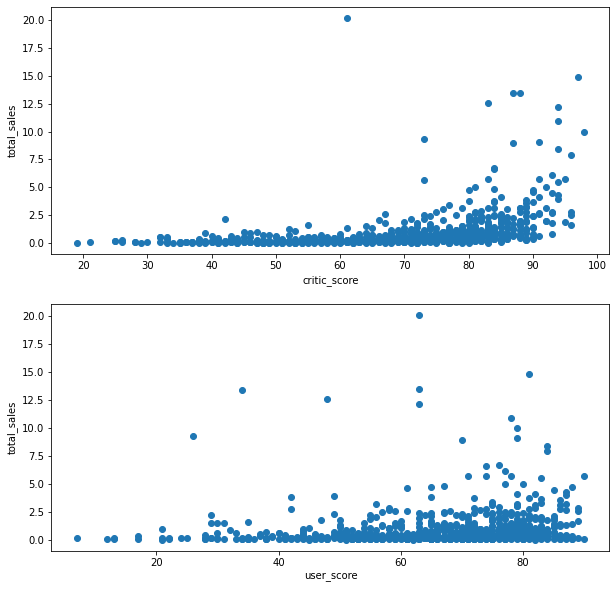

In [35]:
x360_all = top_platforms_pivot[top_platforms_pivot['platform'] == 'X360']
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].scatter(x = x360_all['critic_score'], y = x360_all['total_sales'])
ax[0].set_xlabel("critic_score")
ax[0].set_ylabel("total_sales")

ax[1].scatter(x = x360_all['user_score'], y = x360_all['total_sales'])
ax[1].set_xlabel("user_score")
ax[1].set_ylabel("total_sales")

plt.show()

In [36]:
print('Корреляция между отзывами критиков и продажами:', x360_all['critic_score'].corr(x360_all['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', x360_all['user_score'].corr(x360_all['total_sales']))

Корреляция между отзывами критиков и продажами: 0.39170650253813544
Корреляция между отзывами пользователей и продажами: 0.11330035887501838


Выделила для анализа азвисимости продаж от оценок несколько самых популярных платформ : PS2, Wii, DS и X360.

- Я наблюдаю общее повышение количества продаж на отметке 60 (critic_score - 60, user_score - 6)
- Примечательно, что после отметки в 80 баллов продажи снижаются и к 100 баллам почти сходят на нет
- Судя по коэффициенту корреляции отзывы критиков имеют влияние на продажи, в отличие от отзывов пользователей

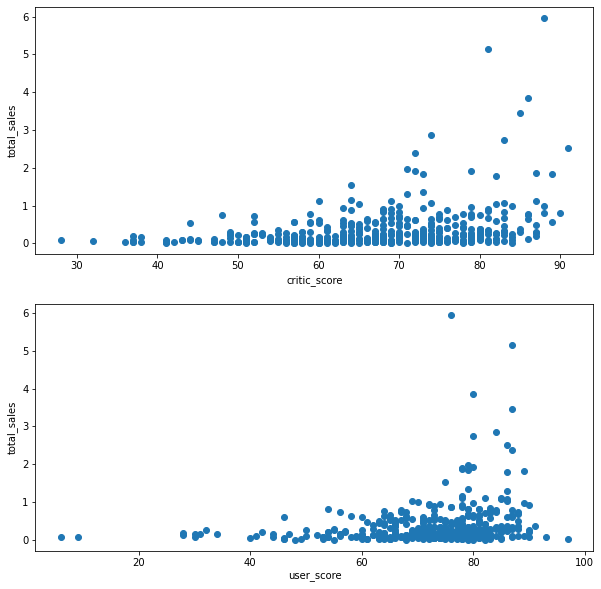

In [37]:
psp_all = top_platforms_pivot[top_platforms_pivot['platform'] == 'PSP']
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].scatter(x = psp_all['critic_score'], y = psp_all['total_sales'])
ax[0].set_xlabel("critic_score")
ax[0].set_ylabel("total_sales")

ax[1].scatter(x = psp_all['user_score'], y = psp_all['total_sales'])
ax[1].set_xlabel("user_score")
ax[1].set_ylabel("total_sales")

plt.show()

In [38]:
print('Корреляция между отзывами критиков и продажами:', psp_all['critic_score'].corr(psp_all['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', psp_all['user_score'].corr(psp_all['total_sales']))

Корреляция между отзывами критиков и продажами: 0.3176033191495287
Корреляция между отзывами пользователей и продажами: 0.22545315040664496


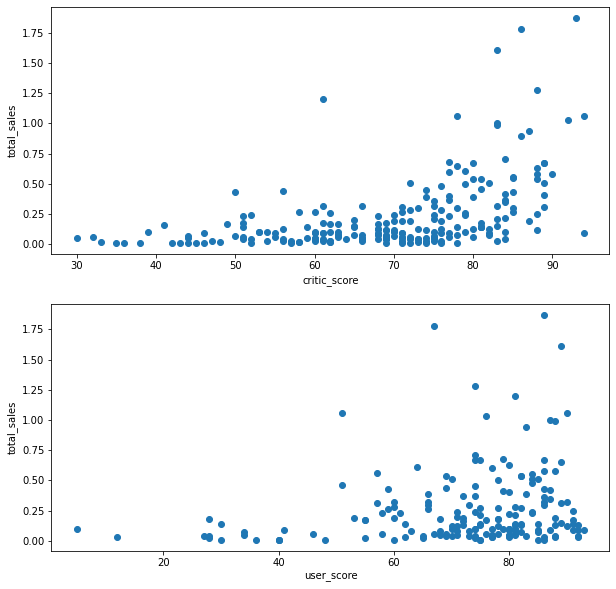

In [39]:
xb_all = top_platforms_pivot[top_platforms_pivot['platform'] == 'XB']
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].scatter(x = xb_all['critic_score'], y = xb_all['total_sales'])
ax[0].set_xlabel("critic_score")
ax[0].set_ylabel("total_sales")

ax[1].scatter(x = xb_all['user_score'], y = xb_all['total_sales'])
ax[1].set_xlabel("user_score")
ax[1].set_ylabel("total_sales")

plt.show()

In [40]:
print('Корреляция между отзывами критиков и продажами:', xb_all['critic_score'].corr(xb_all['total_sales']))
print('Корреляция между отзывами пользователей и продажами:', xb_all['user_score'].corr(xb_all['total_sales']))

Корреляция между отзывами критиков и продажами: 0.4860789623503085
Корреляция между отзывами пользователей и продажами: 0.20665239440860483


- У менее популярных платформ рост прибыли меняется так же, как и у популярных
- Однако коэффициент корреляции показывает что и отзывы критиков и отзывы пользователей влияют на повышение продаж

### Анализ зависимости продаж от жанров

In [41]:
genres_pivot = pd.pivot_table(top_platforms_pivot, index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
genres_pivot


,total_sales
genre,
Action,1028.56
Sports,744.25
Shooter,660.84
Misc,535.80
Role-Playing,493.06
Racing,300.85
Platform,250.94
Simulation,245.04
Fighting,175.34


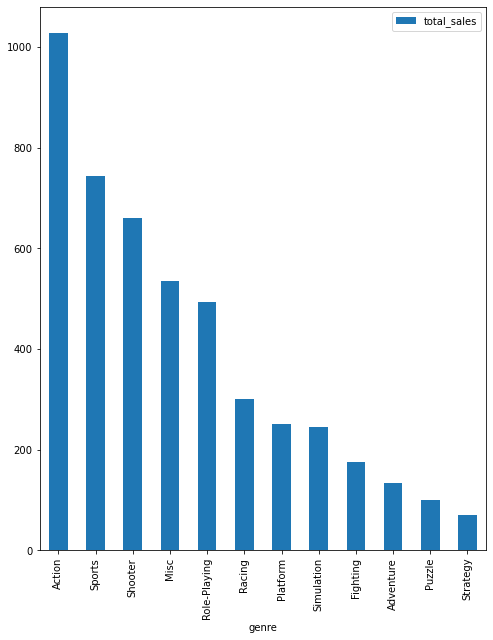

In [42]:
genres_pivot = genres_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

- Самыми популярными жанрами являются Action и Sports
- Одними из самых неприбыльных жанров можно считать Puzzle, Adventure и Strategy

### Вывод 

Для анализа я использовала игры, выпущенные в период с 1991 года и до 2016. В некоторых этапах анализа данных я не использовала игры с пометкой 1000 в столбце с годом выпуска. 

Из всего представленного списка платформ я выделила 18 самых успешных и подходящих для анализа. В ходе анализа мной были выявлены основные критерии и показатели:
- В среднем цикл жизни одной платформы составляет около 10 лет, за исключением некоторых платформ, чья работа не прекращается и на протяжении 30 лет, но их не много.
- PC, PS3, Wii - лидирующие по общим продажам платформы.
- Потенциально прибыльными платформами можно считать платформы PS4 и XOne, так как их цикл жизни только начался и продажи начинают набирать обороты.
- Платформы Wii, X360, PS3, 3DS и PC продолжают работать в 2016 году, но их продажи уже начали идти на спад, предполагаю скорое завершение их жизненного цикла.
- Платформы линейки "Play station"(PS, PS2, PS3, PS4) можно считать самыми успешными из всех представленных, они занимают лидирующие позиции по количеству продаж. Так же в списке лидеров по продажам DS, Wii и X360.

Для анализа зависимости продаж от оценок я выбрала 4 популярные платформы и три менее популярные. Для облегчения сравнения двух показателей(оценки пользователей и критиков) я умножила на 10 оценки пользователей. Диаграммы показали повышение количества продаж на отметке в 60 баллов и их спад начиная с отметки 80 и дальше. Коэффициент корреляции у популярных платформ показал зависимость продаж от оценки критиков, в то время как у менее популярных платформ оценки критиков и пользователей имеют почти равное влияние на продажи. То есть, чем выше оценка, тем выше продажи.

Что касается жанров, лидирующие позиции по продажам занимают игры в жанре Action и Sports, а игры в жанре Puzzle, Adventure и Strategy занимают последние места в рейтинге.

## Портрет пользователя каждого региона 

### Северная америка (NA) 

In [43]:
na_pivot = pd.pivot_table(top_platforms_pivot, index = 'platform', values = ['na_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending = False)
na_pivot.head()

,na_sales
platform,
X360,595.74
Wii,486.87
PS3,390.13
DS,371.98
PS2,200.49


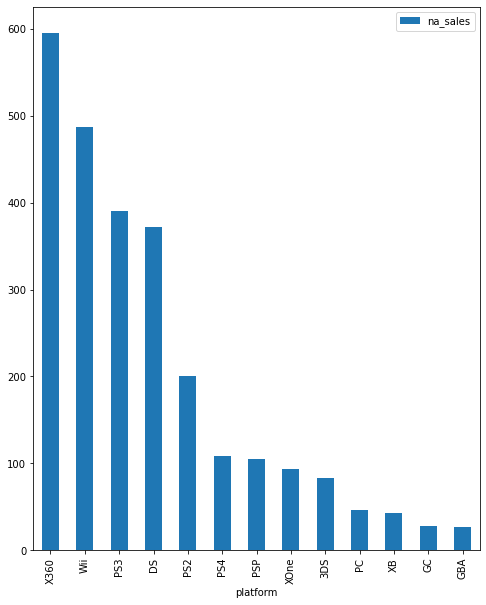

In [44]:
na_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

In [45]:
na_sum = na_pivot['na_sales'].sum()
print('Общие с продажи по Северной Америке составляют:', na_sum, 'млн. копий.')

Общие с продажи по Северной Америке составляют: 2578.25 млн. копий.


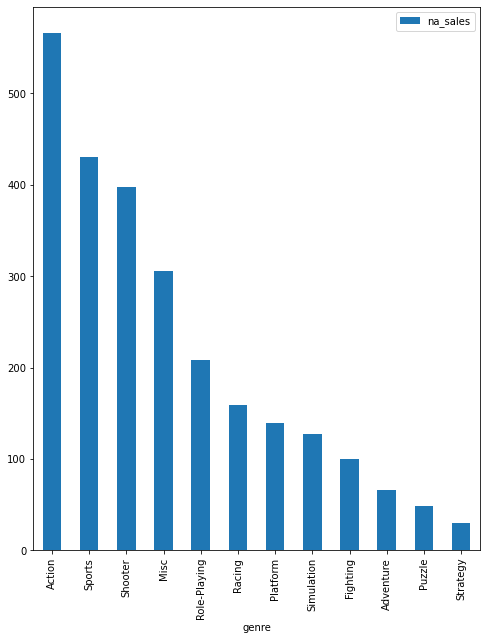

In [46]:
na_genre_pivot = pd.pivot_table(top_platforms_pivot, index = 'genre', values = ['na_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending = False)
na_genre_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

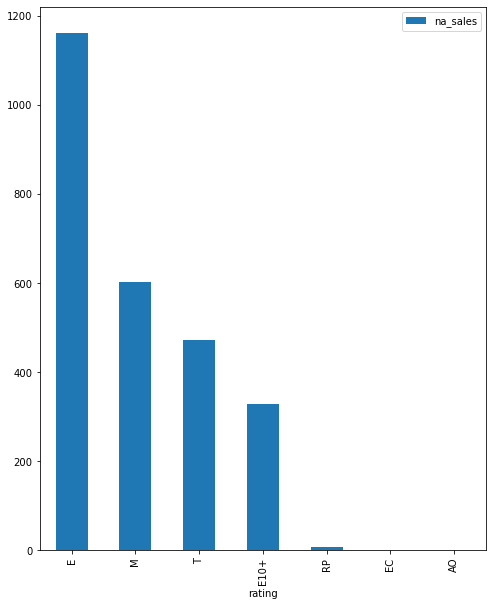

In [47]:
na_rating_pivot = pd.pivot_table(top_platforms_pivot, index = 'rating', values = ['na_sales'], aggfunc = 'sum').sort_values(by='na_sales', ascending = False)
na_rating_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

In [48]:
na_rating_pivot

,na_sales
rating,
E,1162.36
M,601.58
T,473.50
E10+,329.84
RP,8.18
EC,1.53
AO,1.26


- X360, Wii, PS3, DS и PS2 - самые продаваемые платформs
- Общие продажи по региону: 2578.2
- Action, Sports, Shooter, Misc и Role-Playing - самые популярные жанры
- Самые популярные игры с рейтингом E("Для всех"). Игры с рейтингом T("Подросткам") и M("Для взрослых") и E10+("От 10 лет и старше") так же на лидирующих позициях.

### Европа (EU) 

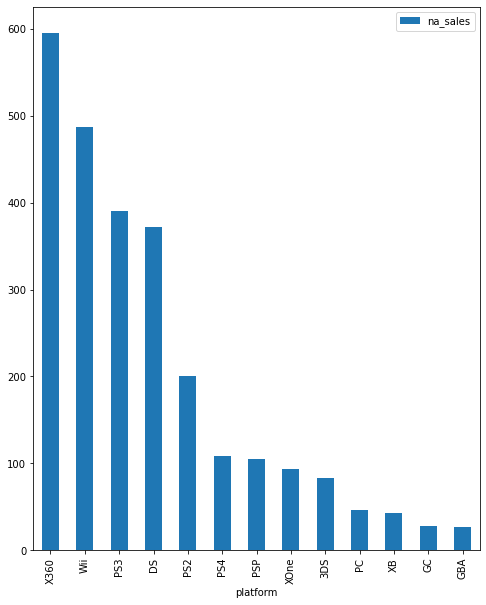

In [49]:
eu_pivot = pd.pivot_table(top_platforms_pivot, index = 'platform', values = ['eu_sales'], aggfunc = 'sum').sort_values(by='eu_sales', ascending = False)
na_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

In [50]:
eu_sum = eu_pivot['eu_sales'].sum()
print('Общие с продажи по Европе составляют:', eu_sum, 'млн. копий.')

Общие с продажи по Европе составляют: 1578.91 млн. копий.


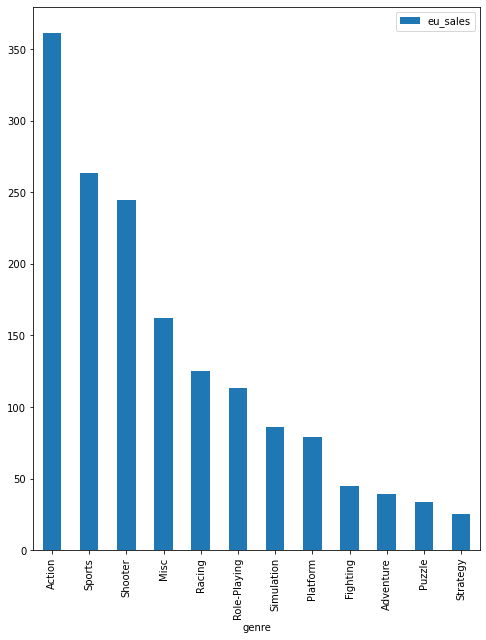

In [51]:
eu_genre_pivot = pd.pivot_table(top_platforms_pivot, index = 'genre', values = ['eu_sales'], aggfunc = 'sum').sort_values(by='eu_sales', ascending = False)
eu_genre_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

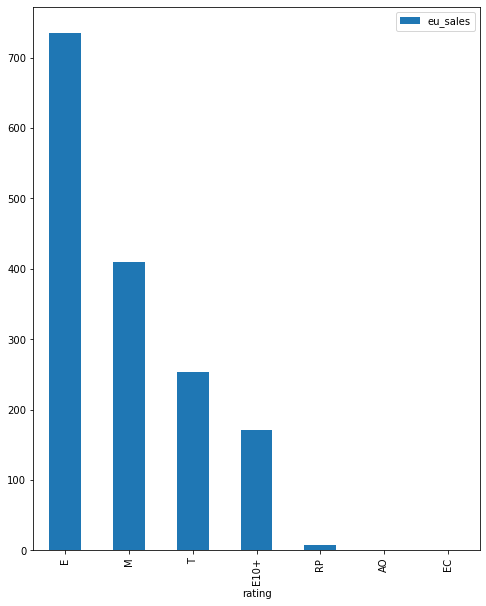

In [52]:
eu_rating_pivot = pd.pivot_table(top_platforms_pivot, index = 'rating', values = ['eu_sales'], aggfunc = 'sum').sort_values(by='eu_sales', ascending = False)
eu_rating_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

In [53]:
eu_rating_pivot

,eu_sales
rating,
E,735.49
M,409.97
T,254.00
E10+,171.54
RP,7.19
AO,0.61
EC,0.11


- X360, Wii, PS3, DS и PS2 - самые популярные платформы
- Action, Sports, Shooter, Misc и Racing - самые популярные жанры 
- Общие продажи по региону: 1578.9
- Самые популярные игры с рейтингом E("Для всех"). Игры с рейтингом M("Для взрослых") и T("Подросткам") и E10+("От 10 лет и старше") так же на лидирующих позициях.

### Япония (JP) <a id="jp"></a>

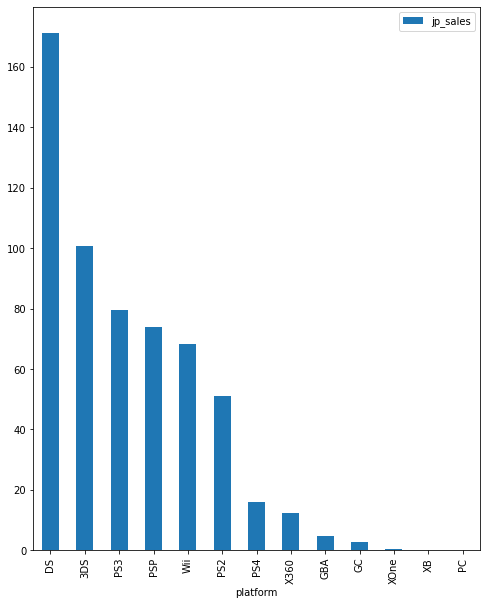

In [54]:
jp_pivot = pd.pivot_table(top_platforms_pivot, index = 'platform', values = ['jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales', ascending = False)
jp_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

In [55]:
jp_sum = jp_pivot['jp_sales'].sum()
print('Общие с продажи по Японии составляют:', jp_sum, 'млн. копий.')

Общие с продажи по Японии составляют: 580.67 млн. копий.


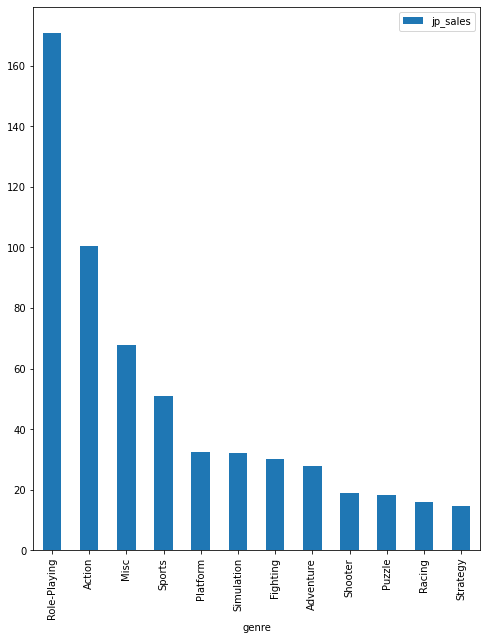

In [56]:
jp_genre_pivot = pd.pivot_table(top_platforms_pivot, index = 'genre', values = ['jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales', ascending = False)
jp_genre_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

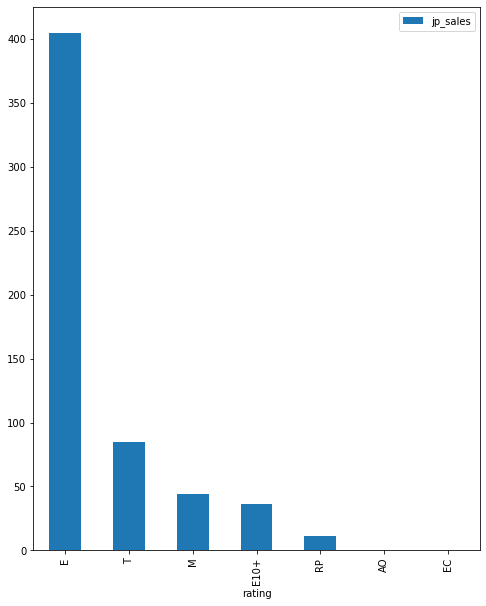

In [57]:
jp_rating_pivot = pd.pivot_table(top_platforms_pivot, index = 'rating', values = ['jp_sales'], aggfunc = 'sum').sort_values(by='jp_sales', ascending = False)
jp_rating_pivot.plot(kind='bar', figsize = (8,10))
plt.show()

In [58]:
jp_rating_pivot

,jp_sales
rating,
E,404.82
T,84.81
M,43.99
E10+,35.96
RP,11.09
AO,0.00
EC,0.00


- DS, 3DS, PS3, PSP и Wii - самые популярные платформы
- Общие продажи по региону: 580.6
- Role-Playing, Action, Misc, Sports и Platform - самые популярные жанры
- Самые популярные игры с рейтингом E("Для всех"). Игры с рейтингом T("Подросткам") и M("Для взрослых") и E10+("От 10 лет и старше") так же на лидирующих позициях.

### Вывод 

###### Северная Америка

- Самый крупный потребитель компьютерных игр
- Топ 5 самых популярных платформ: X360, PS2, Wii, PS3 и DS
- Топ 5 самых популярных жанров: Action, Sports, Shooter, Platform и Misc
- Игры с рейтингом E("Для всех") самые продаваемые, следующие по популярности - T("Подросткам"), M("Для взрослых") и E10+("От 10 лет и старше")

###### Европа

- Топ 5 самых популярных платформ: X360, PS2, Wii, PS3 и DS
- Топ 5 самых популярных жанров: Action, Sports, Shooter, Racing и Misc
- Игры с рейтингом E("Для всех") самые продаваемые, следующие по популярности - M("Для взрослых"), T("Подросткам") и E10+("От 10 лет и старше")

###### Япония

- Топ 5 самых популярных платформ: DS, PS, PS2, SNES и 3DS
- Топ 5 самых популярных жанров: Role-Playing, Action, Sports, Platform и Misc
- Игры с рейтингом E("Для всех") самые продаваемые, следующие по популярности - T("Подросткам"), M("Для взрослых") и E10+("От 10 лет и старше")

Можно сказать, что платформы X360, PS2, Wii, PS3 и DS занимают лидирующие позиции в мире. При этом, если в Европе и Северной Америке на первых местах расположилась X360, а DS на последнем, то в Японии DS занимает первое место, а X360 вообще не входит в топ пять. Это указывает на особенность выбора японского потребителя. 

Так же можно заметить, что популярные жанры игр в Северной Америке и Европе почти схожи. Но японский пользователь отдает предпочтение играм в жанре Role-Playing, что так же подтверждает особенность пользователей данного региона. 

Во всех трех регионах рейтинг E("Для всех") самый популярный, но стоит заметить, что в Евроме на второе место выходят игры с рейтингом M("Для взрослых"). 

## Проверка гипотез 

### Гипотеза №1 
###### Нулевая гипотеза: 
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

###### Альтернативная гипотеза: 
    Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [59]:
xbox_one = top_platforms_pivot[top_platforms_pivot['platform'] == 'XOne']
xbox_one['user_score'].mean()

65.21428571428571

In [60]:
pc_ = top_platforms_pivot[top_platforms_pivot['platform'] == 'PC']
pc_['user_score'].mean()

68.84937888198758

In [61]:
seed(1)

data1 = xbox_one['user_score']
data2 = pc_['user_score']

stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Принимаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

ValueError: `x` and `y` must not contain NaNs.

### Гипотеза №2 
###### Нулевая гипотеза: 
    Средние пользовательские рейтинги жанров Action и Sports одинаковые.

###### Альтернативная гипотеза: 
    Средние пользовательские рейтинги жанров Action и Sports разные.

In [ ]:
action = top_platforms_pivot[top_platforms_pivot['genre'] == 'Action']
action['user_score'].mean()

In [ ]:
sports = top_platforms_pivot[top_platforms_pivot['genre'] == 'Sports']
sports['user_score'].mean()

In [ ]:
seed(1)

data1 = action['user_score']
data2 = sports['user_score']

stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Принимаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

- Нулевую и альтернативную гипотезы я формулировала по принципу "положительно-отрицательно", то есть нулевая гипотеза у меня "положительная", а альтернативная - "отрицательная"
- Для проверки гипотез я применила U-тест Манна-Уитни. Так как распределение было не нормальным, я не смогла применить Т-критерий Стьюдента. 

## Общий вывод 

Основной задачей проекта было выявление закономерностей, определяющих успешность компьютерной игры. 

Исходя из проведенного анализа я выделила основные закономерности:
1. Жанры, обреченные на успех: Action, Sports, Shooter, Role-Playing
2. Перспективные платформы: PS4 и XOne
3. Самые прибыльные игры с рейтингом: E, T, M, E10+
4. Самые популярные платформы: X360, PS2, Wii, PS3, DS 

Стоить упомянуть об особенностях рынка компьютерных игр в разных регионах:
- Пользователи из Японии предпочитают игры жанра Role-Playing и платформу DS
- У пользователей из Европы игры с рейтингом M стоят на втором месте, после всемирно-популярного E. 
- Североамериканский рынок компьютерных игр самый крупный из трех представленных, больше, чем японский и европейский вместе взятые. 

Коэффициент корреляции показал, что на популярных, крупных платформах, на продажи копий влияют только оценки критиков. В менее популярных и крупных платформах оценки критиков и пользователей одинаково вляют на продажи.

Из всего вышесказанного можно примерно составить портрет самой популярной и прибыльной игры в 2017 году:
- Платформа: PS4
- Жанр: Action
- Рейтинг ESRB: E